# Nickolas4 - Modern Portfolio Theory

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as dr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

In [2]:
#Generate portfolio
symbols = ['AAPL', 'MSFT', 'TLT', 'USO', 'GLD', 
           'SPY', 'CAT', 'KO', 'WMT', 'EMB']
asset_count = len(symbols)

In [3]:
#Empty DF to store web data
nickolas4 = pd.DataFrame()

In [4]:
risk_free = dr('^IRX', data_source='yahoo', 
                       start='2010-01-01')['Adj Close']/100
risk_free.tail()

Date
2017-04-24    0.00770
2017-04-25    0.00808
2017-04-26    0.00803
2017-04-27    0.00785
2017-04-28    0.00780
Name: Adj Close, dtype: float64

In [5]:
#Add 10 historic asset returns from Yahoo
for i in symbols:
    nickolas4[i] = dr(i, data_source='yahoo', 
    start='2010-01-01')['Adj Close'].round(2)
nickolas4.columns = symbols

nickolas4.tail()

,AAPL,MSFT,TLT,USO,GLD,SPY,CAT,KO,WMT,EMB
Date,,,,,,,,,,
2017-04-24,143.64,67.53,122.93,10.25,121.48,237.17,96.81,43.28,74.78,114.89
2017-04-25,144.53,67.92,121.45,10.36,120.25,238.55,104.42,43.11,75.05,114.60
2017-04-26,143.68,67.83,122.12,10.26,120.84,238.40,104.66,43.24,75.43,114.58
2017-04-27,143.79,68.27,122.08,10.24,120.39,238.60,102.68,43.01,75.44,114.84
2017-04-28,143.65,68.46,122.35,10.24,120.77,238.08,102.26,43.15,75.18,115.20


## Asset Returns

/Users/NABRARPOUR4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).mean()
  from ipykernel import kernelapp as app


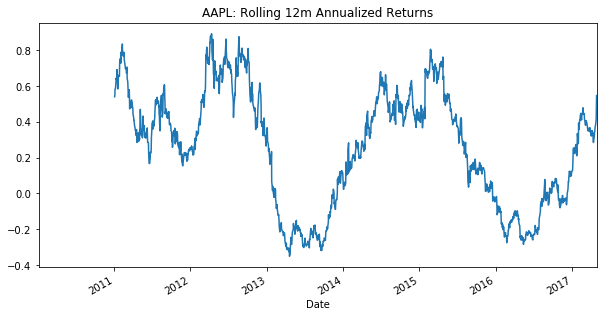

In [13]:
#DF of Rolling Annualized Returns
n4_rolling12mrets = pd.rolling_mean((1 + n4_log), window=252) ** 252 - 1
n4_rolling12mrets['AAPL'].plot(figsize=(10,5), title="AAPL: Rolling 12m Annualized Returns")

#### Normalize Data

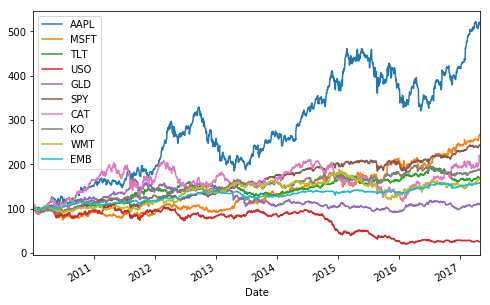

In [6]:
#Normalize Data - Method 1
(nickolas4 / nickolas4.ix[0] * 100).plot(figsize=(8,5))

#### Logarithmic Returns

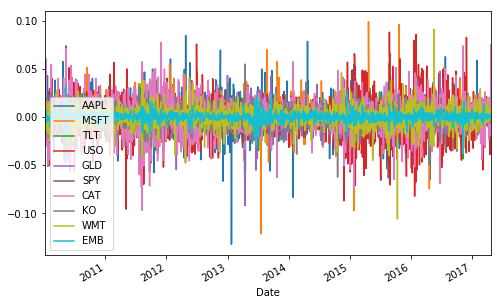

In [7]:
#DF of Logarithim Returns
n4_log = np.log(nickolas4/nickolas4.shift(1))
n4_log.plot(figsize=(8,5))

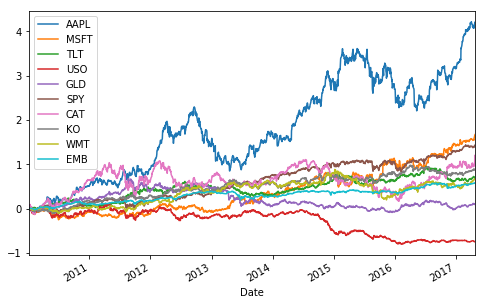

In [15]:
#Cumulative Returns
n4_cumrets = (nickolas4/nickolas4.ix[0]) - 1
n4_cumrets.plot(figsize=(8,5))

In [16]:
#DF of Avg. Annualized Performances 
n4_meanrets = np.log(nickolas4/nickolas4.shift(1)).mean() * 252
n4_meanrets

AAPL    0.225030
MSFT    0.134786
TLT     0.072216
USO    -0.187332
GLD     0.013028
SPY     0.121729
CAT     0.105133
KO      0.086555
WMT     0.070213
EMB     0.062977
dtype: float64

## Asset Volatility

/Users/NABRARPOUR4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  app.launch_new_instance()


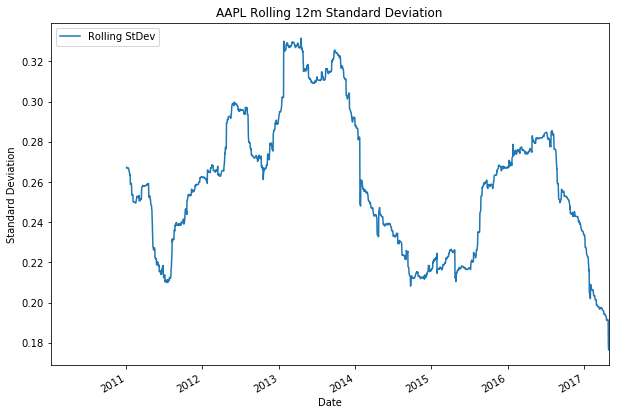

In [9]:
def rolling_stdev_asset(df,ticker):
    #Compute rolling stdev using a 252-day rolling window
    z = pd.rolling_std(df[ticker] * np.sqrt(252), window=252)
    
    #Define the axis
    ax = z.plot(figsize=(10,7), title = 'Portfolio Rolling Standard Deviation',\
                      label='Rolling StDev')
    
    #Add axis labels and legends
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Deviation')
    ax.legend(loc='upper left')
    plt.title(ticker + " Rolling 12m Standard Deviation")
    plt.show()
    
rolling_stdev_asset(n4_log, "AAPL")

/Users/NABRARPOUR4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).std()


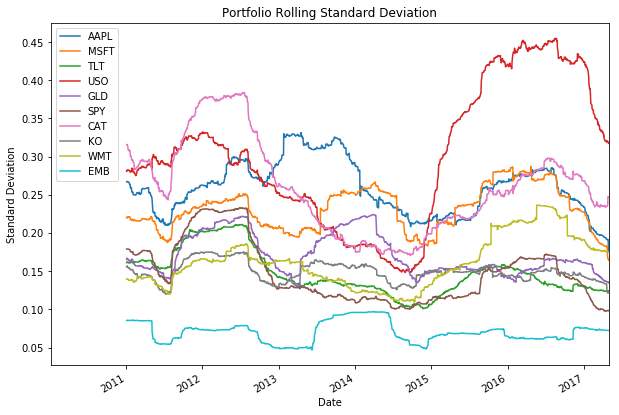

In [10]:
#Rolling Standard Deviation function - Method 1 
def rolling_stdev_multiasset():

    #Compute rolling stdev using a 252-day rolling window
    roll_stdev = pd.rolling_std(n4_log * np.sqrt(252), window=252)
    
    #Define the axis
    ax = roll_stdev.plot(figsize=(10,7), title = 'Portfolio Rolling Standard Deviation',\
                      label='Rolling StDev')
    
    #Add axis labels and legends
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Deviation')
    ax.legend(loc='upper left')
    plt.show()

rolling_stdev_multiasset()

/Users/NABRARPOUR4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=252,center=False).std()
  from ipykernel import kernelapp as app


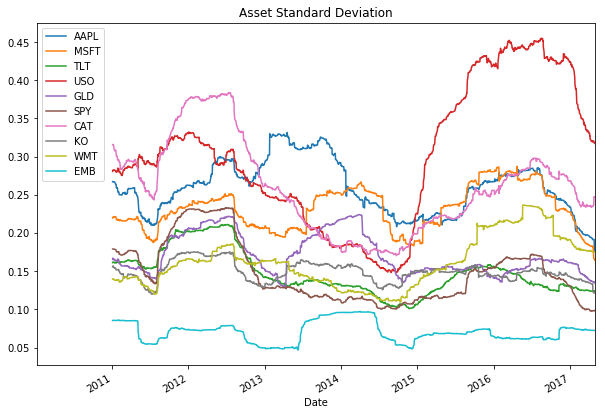

In [12]:
#DF of Rolling Annualized StDev - Method 2
n4_rolling_stdev = pd.rolling_std(n4_log, window=252) * np.sqrt(252)
n4_rolling_stdev.plot(figsize=(10,7),title="Asset Standard Deviation")

## Variance-Covariance Matrix

In [17]:
# Variance-Covariance Matrix
n4_cov = n4_log.cov()
n4_cov

,AAPL,MSFT,TLT,USO,GLD,SPY,CAT,KO,WMT,EMB
AAPL,0.000265,0.000091,-4.131912e-05,0.000072,7.366981e-06,8.629934e-05,0.000116,0.000044,0.000037,1.635952e-05
MSFT,0.000091,0.000205,-4.029626e-05,0.000073,-2.055377e-06,8.967055e-05,0.000113,0.000054,0.000047,1.523802e-05
TLT,-0.000041,-0.000040,8.698586e-05,-0.000058,1.747732e-05,-4.632743e-05,-0.000068,-0.000025,-0.000018,4.810414e-07
USO,0.000072,0.000073,-5.849070e-05,0.000384,3.881721e-05,8.490386e-05,0.000156,0.000045,0.000014,2.580075e-05
GLD,0.000007,-0.000002,1.747732e-05,0.000039,1.146663e-04,8.293928e-07,0.000016,0.000001,-0.000002,8.892171e-06
SPY,0.000086,0.000090,-4.632743e-05,0.000085,8.293928e-07,9.143972e-05,0.000121,0.000055,0.000045,1.642369e-05
CAT,0.000116,0.000113,-6.824054e-05,0.000156,1.571415e-05,1.211696e-04,0.000292,0.000061,0.000047,2.224080e-05
KO,0.000044,0.000054,-2.472221e-05,0.000045,1.031410e-06,5.471020e-05,0.000061,0.000088,0.000037,1.210741e-05
WMT,0.000037,0.000047,-1.765069e-05,0.000014,-2.153633e-06,4.518327e-05,0.000047,0.000037,0.000104,7.526824e-06
EMB,0.000016,0.000015,4.810414e-07,0.000026,8.892171e-06,1.642369e-05,0.000022,0.000012,0.000008,2.106900e-05


## Correlation Matrix

In [18]:
# Correlation Matrix
n4_corr = n4_log.corr()
n4_corr

,AAPL,MSFT,TLT,USO,GLD,SPY,CAT,KO,WMT,EMB
AAPL,1.000000,0.390876,-0.272363,0.226226,0.042295,0.554833,0.416769,0.288190,0.225382,0.219114
MSFT,0.390876,1.000000,-0.301435,0.258656,-0.013391,0.654237,0.459685,0.401969,0.318648,0.231611
TLT,-0.272363,-0.301435,1.000000,-0.320126,0.174998,-0.519453,-0.427982,-0.282713,-0.185170,0.011237
USO,0.226226,0.258656,-0.320126,1.000000,0.185040,0.453230,0.465708,0.246607,0.072000,0.286926
GLD,0.042295,-0.013391,0.174998,0.185040,1.000000,0.008100,0.085838,0.010273,-0.019678,0.180912
SPY,0.554833,0.654237,-0.519453,0.453230,0.008100,1.000000,0.741197,0.610217,0.462322,0.374181
CAT,0.416769,0.459685,-0.427982,0.465708,0.085838,0.741197,1.000000,0.377912,0.267111,0.283423
KO,0.288190,0.401969,-0.282713,0.246607,0.010273,0.610217,0.377912,1.000000,0.391093,0.281328
WMT,0.225382,0.318648,-0.185170,0.072000,-0.019678,0.462322,0.267111,0.391093,1.000000,0.160444
EMB,0.219114,0.231611,0.011237,0.286926,0.180912,0.374181,0.283423,0.281328,0.160444,1.000000


# 1.) Modern Portfolio Theory

* Weights must add to 100% 


* No shorting

In [19]:
weights = np.random.random(len(n4_log.columns))  #generate 10 random numbers between 0 and 1
weights /= np.sum(weights)       #normalize values so that sum = 1 

In [20]:
# 100% Allocation
print sum(weights)
print weights

1.0
[ 0.06960874  0.13671892  0.07768354  0.01610199  0.1931997   0.03426545
  0.14783315  0.1719747   0.1405565   0.01205731]


#### Expected Portfolio Return

In [27]:
# Expected Portfolio Return
def pf_return(df):
    mu = np.sum(df.mean() * weights) * 252
    return mu
pf_return(n4_log)

0.08442909659531736

#### Expected Portfolio Risk

In [28]:
def pf_var(df):
    sigma_sqrd = np.dot(weights.T, np.dot(df.cov() * 252, weights))
    return sigma_sqrd
pf_var(n4_log)

0.011519173460059578

In [29]:
def pf_stdev(df):
    sigma = np.sqrt(np.dot(weights.T, np.dot(df.cov() * 252, weights)))
    return sigma
pf_stdev(n4_log)

0.10732741243531206

#### Sharpe Ratio

In [31]:
def pf_sharpe(df):
    mu = pf_return(df)
    sigma = pf_stdev(df)
    rf = risk_free.mean()
    SR = (mu-rf)/sigma
    return SR
pf_sharpe(n4_log)

0.77563529583005075

#### Portfolio Stats

In [33]:
def pf_stats(df):    
    
    y = pf_return(df)
    x = pf_stdev(df)
    rf = risk_free.mean()
    var = pf_var(df)
    sharpe = (y-rf)/x
    
    print("Expected Portfolio Stats\n") + 40 * "-" + "\n"
    print("Annual Return = %3.2f") %y
    print ("Risk-free rate = %3.4f") %rf
    print("Variance = %3.4f") %var
    print("Standard deviation = %3.4f") %x
    print ('Sharpe Ratio = %3.2f') %sharpe
    
pf_stats(n4_log)

Expected Portfolio Stats
----------------------------------------

Annual Return = 0.08
Risk-free rate = 0.0012
Variance = 0.0115
Standard deviation = 0.1073
Sharpe Ratio = 0.78
